# Лабораторная работа 5

### Колотков Алексей
### Прикладная математика и информатика
### Аналитическая логистика

## Задание 11.1.1 Метод дифференциальной эволюции

### Программно реализуйте метод дифференциальной эволюции и найдите с его помощью минимум заданной функции для всех указанных значений размерности D. Исследуйте влияние параметров на работу алгоритма. В отчет включить следующие данные:

1. Полную постановку задачи.
2. Исходный код программы.
3. График целевой функции для D = 2.
4. Наилучшее найденное оптимальное значение целевой функции и точка, в которой оно достигается.
5. Графики сходимости метода (по оси абсцисс —номер поколения, по оси ординат — текущее оптимальное значение погрешности, т. е. модуль разности точного и приближенного значения минимума). Ось ординат должна быть логарифмической! На одной плоскости изобразить вместе графики для трех «прогонов»алгоритма.
6. Среднее время работы алгоритма.
7. Для размерности D = 2 изобразить на плоскости линии уровня целевой функции и все точки популяции для четырех-шести различных поколений. Номера поколений выбрать таким образом, чтобы была видна сходимость метода.
8. Ответы на следующие вопросы:

    (a) Как зависит скорость сходимости от количества особей в популяции N?
    
    (b) Как зависит скорость сходимости от константы дифференцирования F?

    (c) Как зависит скорость сходимости от константы скрещивания C?

    (d) Какие значения параметров вам кажутся оптимальными?

Подтвердите свои выводы экспериментальными данными!

Целевая функция - функция Розенброка.
$$f(x) = \sum_{i=1}^{D-1}(100(x_i^2 - x_{i+1})^2 + (1 - x_i)^2),$$ 
$$x_i \in [-2, 2], D = 2,10,100$$

### 1. Полная постановка задачи

Задана функция 
$$f(x) = \sum_{i=1}^{D-1}(100(x_i^2 - x_{i+1})^2 + (1 - x_i)^2),$$
$$f: S \rightarrow [−2,2]^D, D = 2,10,100.$$
Решается задача непрерывной глобальной оптимизации: требуется найти $x^{*}$ такое, что $f(x^{*}) \leq f(x) \forall x \in S$,

что также можно записать как $$x* = arg\min_{x \in S} f(x)$$

### 2. Исходный код программы

In [1]:
import numpy as np
import math

from matplotlib import pyplot as plt

from sympy import *
import itertools

from scipy.optimize import rosen, differential_evolution

import random
import time

from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d import Axes3D

In [2]:
def get_bounds(n = 2, bounds = (-2, 2)):
    return [bounds for _ in range(n)]

def denormalize(x, bounds):
    return min(bounds) + x * (max(bounds) - min(bounds))

In [3]:
def de(rosen, D, bounds, F = 0.8, C = 0.7, iterations = 100, gener_to_save = [1, 5, 10, 50], saved = [], pop_size = None):
        
    if not pop_size:
        pop_size = 10 * D
    
    
    pop = np.random.uniform(*bounds, (pop_size, D))
    
    fitness = np.asarray([rosen(ind) for ind in pop])
    
    best_idx = np.argmin(fitness)
    best = pop[best_idx]
    
    for i in range(iterations):
        
        if i in gener_to_save:
            saved.append(pop)
        
        for j in range(pop_size):
            
            idxs = [idx for idx in range(pop_size) if idx != j]
            a, b, betha = pop[np.random.choice(idxs, 3, replace = False)]
        
            delta = b - a

            mutant = np.clip(betha + F * delta, *bounds)
            
            cross_points = np.random.rand(D) < C
            
            if not np.any(cross_points):
                cross_points[np.random.randint(0, D)] = True
            
            
            for i, item in enumerate(cross_points):
                if item:
                    mutant[i] = pop[j][i]
            
            
            f = rosen(mutant)
            
            if f < fitness[j]:
                fitness[j] = f
                pop[j] = mutant
                
                if f < fitness[best_idx]:
                    best_idx = j
                    best = mutant
            
        yield best, fitness[best_idx]

### 3. График целевой функции для D = 2

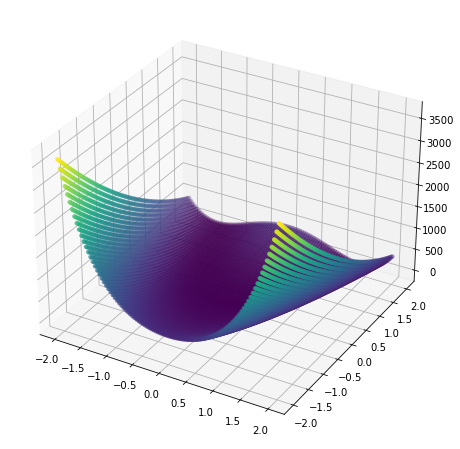

In [48]:
plt.figure(figsize = (12, 8))
ax = plt.axes(projection='3d')

x = np.linspace(-2, 2, 100)
y = np.linspace(-2, 2, 100)

x, y = np.meshgrid(x, y)
x = np.ravel(x)
y = np.ravel(y)
z = np.array([rosen(item) for item in zip(x,y)])

ax.scatter(x, y, z, c=z, cmap='viridis', linewidth=0.1)

plt.show()

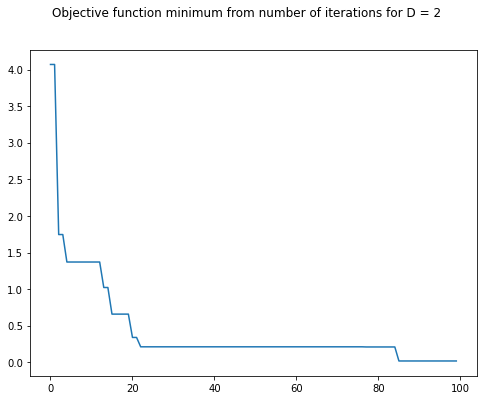

In [5]:
result = list(de(rosen, D = 2, bounds = (-2, 2)))
x, f = zip(*result)
plt.figure(figsize = (8, 6))
plt.suptitle('Objective function minimum from number of iterations for D = 2')
plt.plot(f)
plt.show()

In [6]:
result[-1]

(array([0.90977336, 0.837691  ]), 0.018147712588130905)

### 4. Наилучшее найденное оптимальное значение целевой функции и точка, в которой оно достигается:

Оптимальное значение целевой функции: 0.0181


Точка, в которой оно достигается: (0.9098, 0.8377)

### 5. Графики сходимости метода:

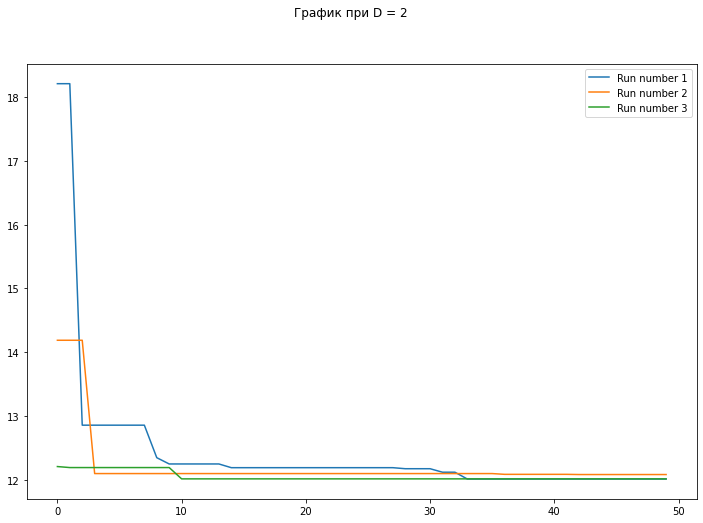

In [7]:
plt.figure(figsize = (12, 8))
for i in range(3):
    result = list(de(rosen, D = 2, bounds = (-2, 2), iterations = 50))
    x, f = zip(*result)
    f = np.array(f)
    correct = -12 * np.ones(shape = f.shape)
    plt.plot(np.abs(correct - f), label='Run number {}'.format(i+1))
plt.legend()
plt.suptitle('График при D = 2')
plt.show()

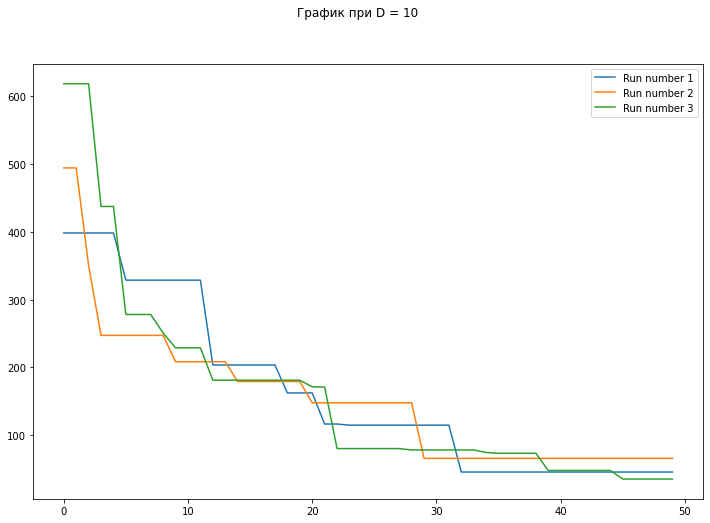

In [8]:
plt.figure(figsize = (12, 8))
for i in range(3):
    result = list(de(rosen, D = 10, bounds = (-2, 2), iterations = 50))
    x, f = zip(*result)
    f = np.array(f)
    plt.plot(f, label='Run number {}'.format(i+1))
plt.legend()
plt.suptitle('График при D = 10')
plt.show()

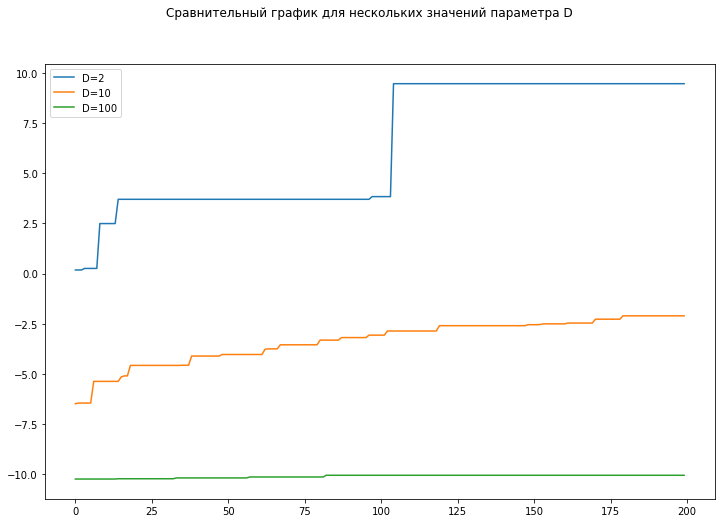

In [10]:
plt.figure(figsize = (12, 8))
for D in [2, 10, 100]:
    it = list(de(rosen, D = D, bounds = (-2, 2), iterations = 200)) 
    x, f = zip(*it)
    f = np.array(f)
    plt.plot(np.log(abs(f)) * -1, label='D={}'.format(D))
plt.suptitle('Сравнительный график для нескольких значений параметра D')
plt.legend()
plt.show()

### 6. Среднее время работы алгоритма

In [11]:
%%timeit
a = list(de(rosen, D = 2, bounds = (-2, 2), iterations = 50))

89.6 ms ± 2.06 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [12]:
%%timeit
a = list(de(rosen, D = 2, bounds = (-2, 2), iterations = 100))

174 ms ± 9.17 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [13]:
%%timeit
a = list(de(rosen, D = 2, bounds = (-2, 2), iterations = 500))

882 ms ± 22.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [14]:
%%timeit
a = list(de(rosen, D = 10, bounds = (-2, 2), iterations = 50))

541 ms ± 16.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [15]:
%%timeit
a = list(de(rosen, D = 20, bounds = (-2, 2), iterations = 50))

1.38 s ± 83.9 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


Время работы алгоритма линейно зависит от количества итераций $(t_{D=500} = 10*t_{D=50})$, а также линейно зависит от размерности.

### 8. Различные значения параметров
(a) Как зависит скорость сходимости от количества особей в популяции N?

(b) Как зависит скорость сходимости от константы дифференцирования F?

(c) Как зависит скорость сходимости от константы скрещивания C?

(d) Какие значения параметров вам кажутся оптимальными?

#### a) количество особей в популяции N

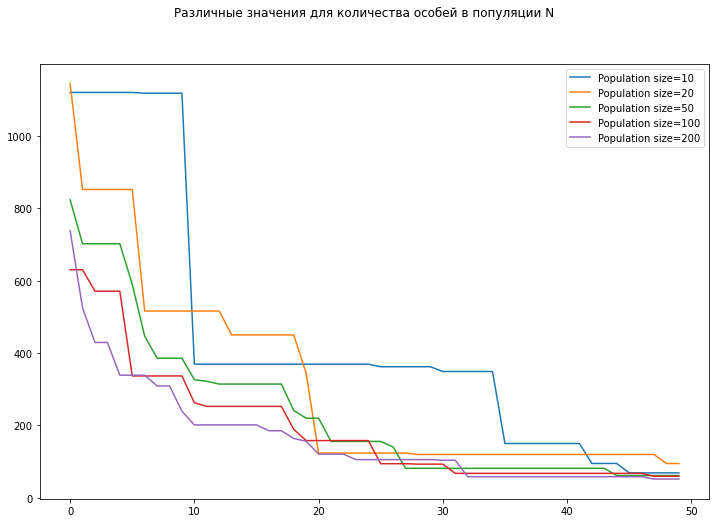

In [30]:
plt.figure(figsize = (12, 8))
for pop_size in [10,20, 50, 100, 200]:
    it = list(de(rosen, D = 10, bounds = (-2, 2), pop_size = pop_size, iterations = 50)) 
    x, f = zip(*it)
    plt.plot(f, label='Population size={}'.format(pop_size))
plt.suptitle('Различные значения для количества особей в популяции N')
plt.legend()
plt.show()

Чем больше размер популяции, тем быстрее происходит сходимость

#### b) константа дифференцирования F

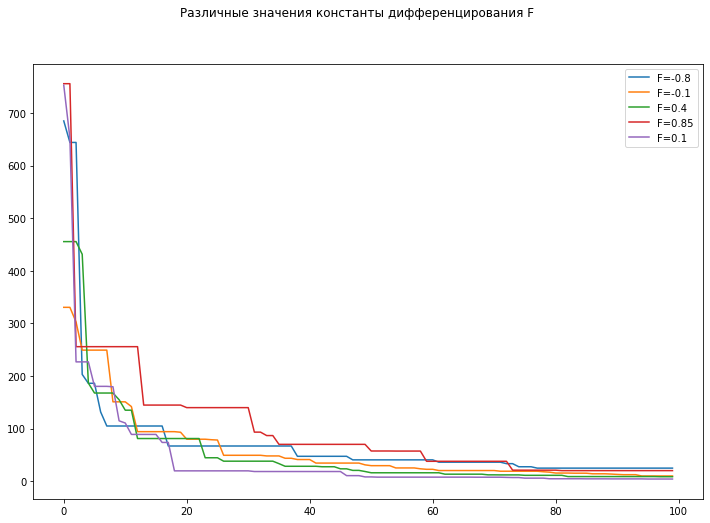

In [24]:
plt.figure(figsize = (12, 8))
for F in [-0.8, -0.1, 0.4, 0.85, 0.1]:
    it = list(de(rosen, F = F, D = 10, bounds = (-2, 2))) 
    x, f = zip(*it)
    plt.plot(f, label='F={}'.format(F))
plt.suptitle('Различные значения константы дифференцирования F')
plt.legend()
plt.show()

Сходимость происходит быстрее всего при значении F = -0.1 и F = 0.1.

#### c) константа скрещивания С

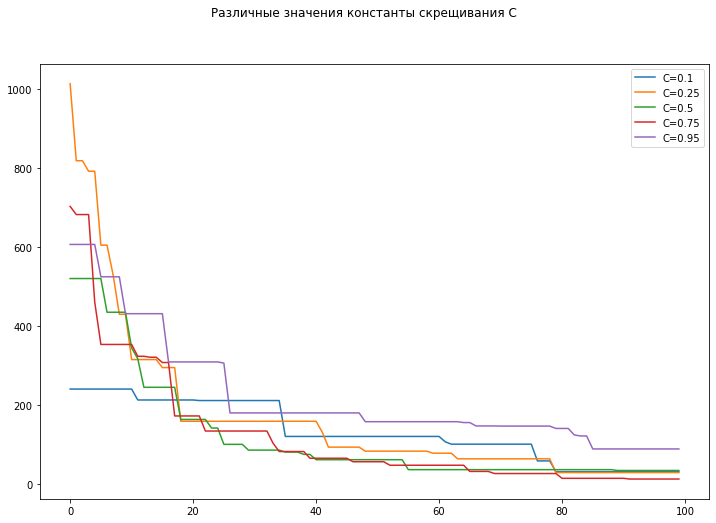

In [25]:
plt.figure(figsize = (12, 8))
for C in [0.1, 0.25, 0.5, 0.75, 0.95]:
    it = list(de(rosen, C = C, D = 10, bounds = (-2, 2))) 
    x, f = zip(*it)
    plt.plot(f, label='C={}'.format(C))
plt.suptitle('Различные значения константы скрещивания C')
plt.legend()
plt.show()

Cходимость происходит быстрее всего при значении С = 0.75. Вероятно, это объясняется хорошим балансом между мутациями и использованием уже найденных оптимальных значений.

#### d) оптимальные значения параметров

В данном случае оптимальными значениями параметров являются:
N = 100 (компромисс между скоростью сходимости и временем работы алгоритма), F = 0.1, C = 0.75.